In [1]:
import py_vollib_vectorized as pyvol
import blackscholes as b_s

# import py_vollib_vectorized.api as pyvol
import financetoolkit as fintk
from financetoolkit import Toolkit
import qfin as qf
import yfinance as yf
import ffn
# from dotenv import load_dotenv

In [2]:
import dotenv


# api_key = "e45b9d954f1407d6407d0bb1324bb6a0"
API_KEY = {}

API_KEY = dotenv.get_key(
    dotenv_path="C:/Users/eorlo/.openbb_terminal/.env",
    key_to_get="API_KEY_FINANCIALMODELINGPREP",
)
print(f"{type(API_KEY)}: {API_KEY}")


# def _key(api_key):
#     openbb_env = load_dotenv(dotenv_path="C:/Users/eorlo/.openbb_terminal/.env")
#     openbb_env["API_KEY_"]
#     return openbb_env

<class 'str'>: e45b9d954f1407d6407d0bb1324bb6a0


In [9]:
companies = Toolkit(
    ["NVDA", "AAPL", "TSLA", "META"],
    api_key=API_KEY,
    start_date="2023-02-01",
)
print(companies.get_quote(progress_bar=True))

Obtaining company quotes: 100%|██████████| 4/4 [00:00<00:00,  9.49it/s]


                                                NVDA  \
Symbol                                          NVDA   
Name                              NVIDIA Corporation   
Price                                         670.33   
Changes Percentage                            -3.483   
Change                                        -24.19   
Day Low                                       666.13   
Day High                                      688.88   
Year High                                     746.11   
Year Low                                      204.21   
Market Capitalization                  1655715100000   
Price Average 50 Days                       574.0246   
Price Average 200 Days                      464.6433   
Exchange                                      NASDAQ   
Volume                                      32048882   
Average Volume                              44840920   
Open                                          680.06   
Previous Close                                69

In [10]:
_bsm = companies.options.get_black_scholes_model()
_bsm

Obtaining historical data: 100%|██████████| 5/5 [00:00<00:00,  9.58it/s]


2024-02-22  2024-02-23  2024-02-24  2024-02-25  \
Ticker Strike Price                                                   
NVDA   500             170.2827    170.3413    170.3998    170.4584   
       505             165.2833    165.3424    165.4016    165.4607   
       510             160.2839    160.3436    160.4034    160.4631   
       515             155.2845    155.3448    155.4051    155.4655   
       520              150.285     150.346    150.4069    150.4678   
...                         ...         ...         ...         ...   
META   560                  0.0         0.0         0.0      0.0002   
       565                  0.0         0.0         0.0      0.0001   
       570                  0.0         0.0         0.0         0.0   
       575                  0.0         0.0         0.0         0.0   
       580                  0.0         0.0         0.0         0.0   

                     2024-02-26  2024-02-27  2024-02-28  2024-02-29  \
Ticker Strike Price                                                   
NVDA   500             170.5169    170.5755     170.634    170.6926   
       505             165.5199     165.579    165.6382    165.6975   
       510             160.5229    160.5826    160.6424    160.7023   
       515             155.5258    155.5862    155.6466    155.7073   
       520             150.5288    150.5898    150.6509    150.7125   
...                         ...         ...         ...         ...   
META   560               0.0011      0.0042      0.0111      0.0235   
       565               0.0006      0.0023      0.0066      0.0147   
       570               0.0003      0.0012      0.0038      0.0091   
       575               0.0001      0.0007      0.0022      0.0055   
       580               0.0001      0.0003      0.0012      0.0033   

                     2024-03-01  2024-03-02  ...  2024-03-12  2024-03-13  \
Ticker Strike Price                          ...                           
NVDA   500             170.7513    170.8103  ...    171.4583    171.5336   
       505             165.7569    165.8167  ...    166.4926    166.5731   
       510             160.7626    160.8235  ...    161.5337    161.6203   
       515             155.7686    155.8307  ...    156.5831     156.677   
       520              150.775    150.8388  ...    151.6428    151.7453   
...                         ...         ...  ...         ...         ...   
META   560               0.0427      0.0697  ...      0.8012      0.9148   
       565                0.028      0.0474  ...      0.6455      0.7431   
       570               0.0181      0.0319  ...      0.5178      0.6013   
       575               0.0116      0.0213  ...      0.4137      0.4847   
       580               0.0074       0.014  ...      0.3292      0.3892   

                     2024-03-14  2024-03-15  2024-03-16  2024-03-17  \
Ticker Strike Price                                                   
NVDA   500             171.6114    171.6917    171.7747    171.8605   
       505             166.6565    166.7429    166.8323    166.9248   
       510             161.7103    161.8038    161.9006    162.0009   
       515             156.7748    156.8764    156.9819    157.0911   
       520             151.8521    151.9631    152.0784    152.1977   
...                         ...         ...         ...         ...   
META   560               1.0341      1.1588      1.2886      1.4231   
       565               0.8465      0.9553      1.0692      1.1879   
       570               0.6904      0.7848      0.8842      0.9884   
       575                0.561      0.6425      0.7288      0.8198   
       580               0.4542      0.5242      0.5988       0.678   

                     2024-03-18  2024-03-19  2024-03-20  2024-03-21  
Ticker Strike Price                                                  
NVDA   500             171.9489      172.04    172.1339    172.2305  
       505             167.0203    167.1188    167

In [11]:
_binom = companies.options.get_binomial_model(american_option=True)
_binom.head(2)
# _binom.drop(columns=["Movement"])

Calculating Binomial Trees: 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]


2024-02-21  2024-03-28  2024-05-04  \
Ticker Strike Price Movement                                         
NVDA   500          UUUUUUUUUU    356.8402    434.5455    535.3249   
                    UUUUUUUUUD         NaN     275.524    328.7983   

                                2024-06-09  2024-07-16  2024-08-21  \
Ticker Strike Price Movement                                         
NVDA   500          UUUUUUUUUU    662.1046    816.7012    999.8308   
                    UUUUUUUUUD    402.1816    499.8422    624.8172   

                                2024-09-27  2024-11-02  2024-12-09  \
Ticker Strike Price Movement                                         
NVDA   500          UUUUUUUUUU   1211.9667   1455.0082   1733.4118   
                    UUUUUUUUUD    778.0953    958.5962   1165.4444   

                                2025-01-14  2025-02-20  
Ticker Strike Price Movement                            
NVDA   500          UUUUUUUUUU   2052.2765   2417.4361  
                    UUUUUUUUUD   1402.4392   1673.9277

In [12]:
_binom.columns

PeriodIndex(['2024-02-21', '2024-03-28', '2024-05-04', '2024-06-09',
             '2024-07-16', '2024-08-21', '2024-09-27', '2024-11-02',
             '2024-12-09', '2025-01-14', '2025-02-20'],
            dtype='period[D]')

In [13]:
companies.options.get_binomial_model(american_option=True)

Calculating Binomial Trees: 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


2024-02-21  2024-03-28  2024-05-04  \
Ticker Strike Price Movement                                         
NVDA   500          UUUUUUUUUU    356.8402    434.5455    535.3249   
                    UUUUUUUUUD         NaN     275.524    328.7983   
                    UUUUUUUUDD         NaN         NaN    220.0849   
                    UUUUUUUDDD         NaN         NaN         NaN   
                    UUUUUUDDDD         NaN         NaN         NaN   
...                                    ...         ...         ...   
META   580          UUUUDDDDDD         NaN         NaN         NaN   
                    UUUDDDDDDD         NaN         NaN         NaN   
                    UUDDDDDDDD         NaN         NaN         NaN   
                    UDDDDDDDDD         NaN         NaN         NaN   
                    DDDDDDDDDD         NaN         NaN         NaN   

                                2024-06-09  2024-07-16  2024-08-21  \
Ticker Strike Price Movement                                         
NVDA   500          UUUUUUUUUU    662.1046    816.7012    999.8308   
                    UUUUUUUUUD    402.1816    499.8422    624.8172   
                    UUUUUUUUDD    251.9223    299.5165    368.3138   
                    UUUUUUUDDD    187.5118    202.4524    227.3569   
                    UUUUUUDDDD         NaN    173.0742    177.2774   
...                                    ...         ...         ...   
META   580          UUUUDDDDDD         NaN         NaN         NaN   
                    UUUDDDDDDD         NaN         NaN         NaN   
                    UUDDDDDDDD         NaN         NaN         NaN   
                    UDDDDDDDDD         NaN         NaN         NaN   
                    DDDDDDDDDD         NaN         NaN         NaN   

                                2024-09-27  2024-11-02  2024-12-09  \
Ticker Strike Price Movement                                         
NVDA   500          UUUUUUUUUU   1211.9667   1455.0082   1733.4118   
                    UUUUUUUUUD    778.0953    958.5962   1165.4444   
                    UUUUUUUUDD      463.62    588.6948    742.2234   
                    UUUUUUUDDD    267.8803    331.6177    426.8603   
                    UUUUUUDDDD    185.3659    200.9311    230.8844   
...                                    ...         ...         ...   
META   580          UUUUDDDDDD         0.0         0.0         0.0   
                    UUUDDDDDDD         NaN         0.0         0.0   
                    UUDDDDDDDD         NaN         NaN         0.0   
                    UDDDDDDDDD         NaN         NaN         NaN   
                    DDDDDDDDDD         NaN         NaN         NaN   

                                2025-01-14  2025-02-20  
Ticker Strike Price Movement                            
NVDA   500          UUUUUUUUUU   2052.2765   2417.4361  
                    UUUUUUUUUD   1402.4392   1673.9277  
                    UUUUUUUUDD    918.2128   1119.9023  
                    UUUUUUUDDD    557.3915    707.0703  
                    UUUUUUDDDD    288.5255    399.4485  
...                                    ...         ...  
META   580          UUUUDDDDDD         0.0         0.0  
                    UUUDDDDDDD         0.0         0.0  
                    UUDDDDDDDD         0.0         0.0  
                    UDDDDDDDDD         0.0         0.0  
                    DDDDDDDDDD         NaN         0.0  

[1661 rows x 11 columns]

Simulating Stock Prices: 100%|██████████| 4/4 [00:00<00:00, 119.20it/s]


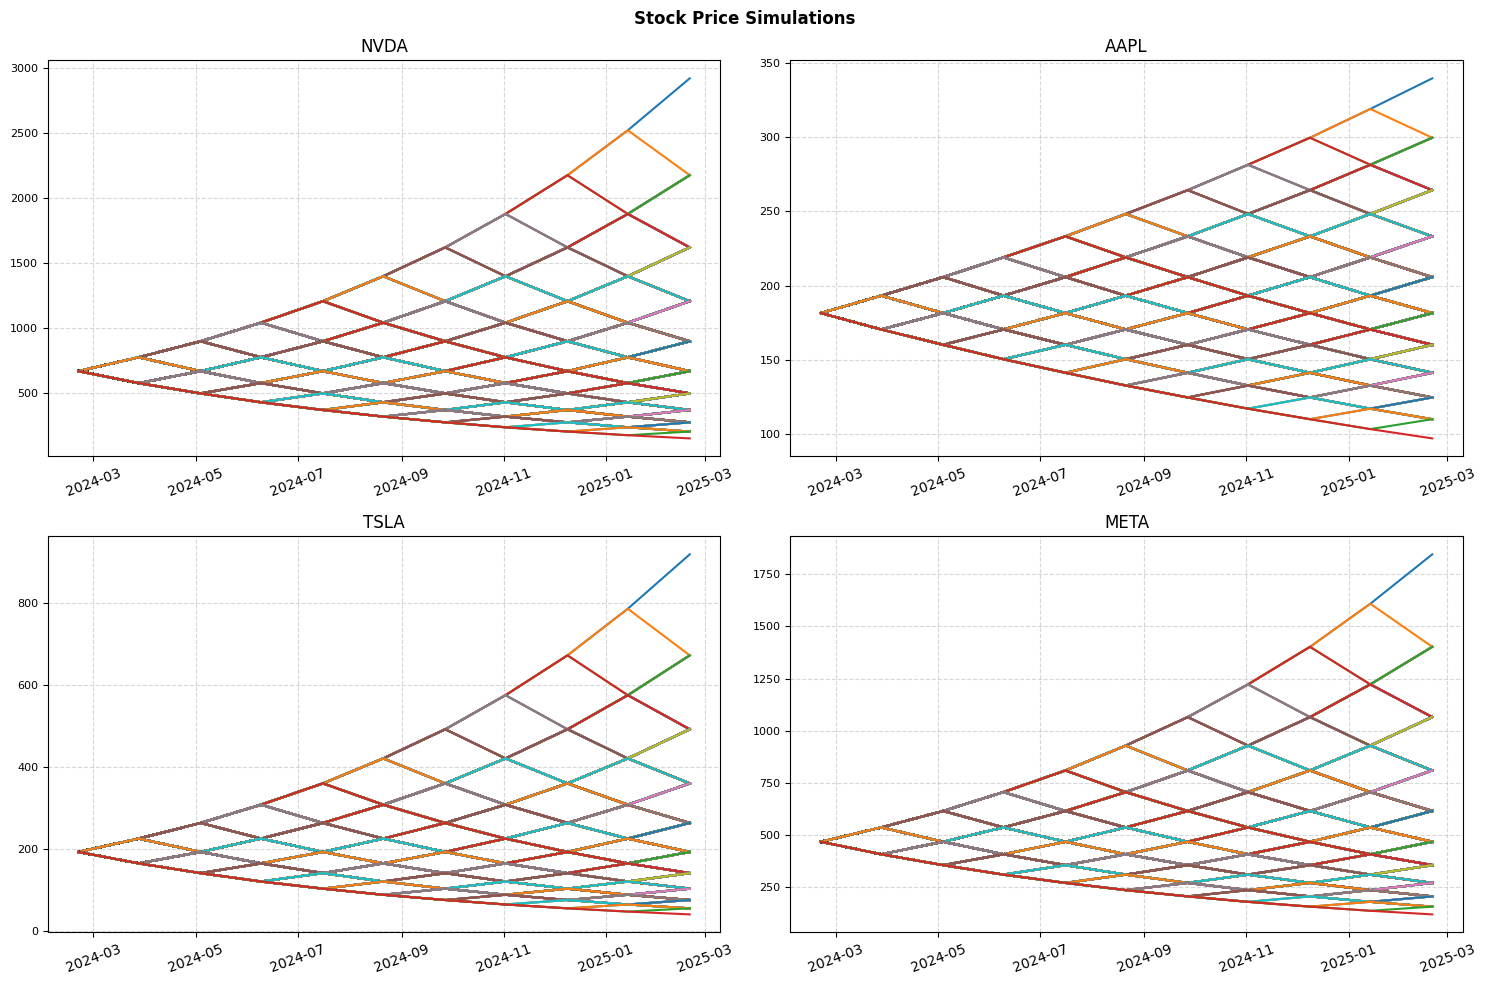

In [14]:
from matplotlib import pyplot as plt


mc_sim = companies.options.get_stock_price_simulation(timesteps=10)
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

mc_sim_transposed = mc_sim.T
mc_sim_transposed.index = mc_sim_transposed.index.astype("datetime64[ns]")

for i, ticker in enumerate(companies._tickers):
    ax[i // 2, i % 2].plot(mc_sim_transposed[ticker])
    ax[i // 2, i % 2].set_title(ticker)
    ax[i // 2, i % 2].xaxis.set_tick_params(rotation=20)
    ax[i // 2, i % 2].yaxis.set_tick_params(labelsize=8)
    ax[i // 2, i % 2].grid(linestyle="--", alpha=0.5)

fig.suptitle("Stock Price Simulations", fontweight="bold")
fig.tight_layout()
plt.show()

In [15]:
companies.options.get_delta()

2024-02-22  2024-02-23  2024-02-24  2024-02-25  \
Ticker Strike Price                                                   
NVDA   500                  1.0         1.0         1.0         1.0   
       505                  1.0         1.0         1.0         1.0   
       510                  1.0         1.0         1.0         1.0   
       515                  1.0         1.0         1.0         1.0   
       520                  1.0         1.0         1.0         1.0   
...                         ...         ...         ...         ...   
META   560                  0.0         0.0         0.0         0.0   
       565                  0.0         0.0         0.0         0.0   
       570                  0.0         0.0         0.0         0.0   
       575                  0.0         0.0         0.0         0.0   
       580                  0.0         0.0         0.0         0.0   

                     2024-02-26  2024-02-27  2024-02-28  2024-02-29  \
Ticker Strike Price                                                   
NVDA   500                  1.0         1.0         1.0         1.0   
       505                  1.0         1.0         1.0         1.0   
       510                  1.0         1.0         1.0         1.0   
       515                  1.0         1.0         1.0      0.9999   
       520                  1.0         1.0         1.0      0.9999   
...                         ...         ...         ...         ...   
META   560               0.0002      0.0006      0.0014      0.0027   
       565               0.0001      0.0003      0.0009      0.0017   
       570                  0.0      0.0002      0.0005      0.0011   
       575                  0.0      0.0001      0.0003      0.0007   
       580                  0.0      0.0001      0.0002      0.0004   

                     2024-03-01  2024-03-02  ...  2024-03-12  2024-03-13  \
Ticker Strike Price                          ...                           
NVDA   500                  1.0      0.9999  ...      0.9972      0.9966   
       505               0.9999      0.9999  ...      0.9963      0.9955   
       510               0.9999      0.9998  ...      0.9951      0.9942   
       515               0.9999      0.9997  ...      0.9937      0.9926   
       520               0.9998      0.9996  ...      0.9919      0.9907   
...                         ...         ...  ...         ...         ...   
META   560               0.0044      0.0065  ...      0.0429      0.0472   
       565                0.003      0.0046  ...      0.0355      0.0393   
       570                0.002      0.0032  ...      0.0292      0.0327   
       575               0.0013      0.0022  ...       0.024       0.027   
       580               0.0009      0.0015  ...      0.0196      0.0222   

                     2024-03-14  2024-03-15  2024-03-16  2024-03-17  \
Ticker Strike Price                                                   
NVDA   500               0.9959      0.9952      0.9944      0.9936   
       505               0.9947      0.9939       0.993       0.992   
       510               0.9933      0.9922      0.9912      0.9901   
       515               0.9915      0.9903       0.989      0.9877   
       520               0.9893      0.9879      0.9865       0.985   
...                         ...         ...         ...         ...   
META   560               0.0514      0.0557        0.06      0.0642   
       565               0.0432      0.0471      0.0511       0.055   
       570               0.0362      0.0397      0.0433      0.0469   
       575               0.0301      0.0333      0.0366      0.0398   
       580                0.025      0.0279      0.0308      0.0337   

                     2024-03-18  2024-03-19  2024-03-20  2024-03-21  
Ticker Strike Price                                                  
NVDA   500               0.9928      0.9919      0.9909        0.99  
       505                0.991        0.99      0

In [21]:
companies.options.get_gamma(
    start_date="2024-01-02",
    strike_price_range=0.2,
    expiration_time_range=180,
    show_input_info=True,
)

Based on the period 2022-02-01 to 2024-02-21 the following parameters were used:
Stock Price: NVDA (481.68), AAPL (185.4), TSLA (248.42), META (346.29), Benchmark (472.65)
Volatility: NVDA (46.51%), AAPL (19.84%), TSLA (49.37%), META (43.5%), Benchmark (12.54%)
Dividend Yield: NVDA (0.03%), AAPL (0.13%), TSLA (0.0%), META (0.11%)
Risk Free Rate: 3.95%


2024-01-03  2024-01-04  2024-01-05  2024-01-06  \
Ticker Strike Price                                                   
NVDA   385                  0.0         0.0         0.0         0.0   
       390                  0.0         0.0         0.0         0.0   
       395                  0.0         0.0         0.0         0.0   
       400                  0.0         0.0         0.0         0.0   
       405                  0.0         0.0         0.0         0.0   
...                         ...         ...         ...         ...   
META   390                  0.0         0.0      0.0003      0.0009   
       395                  0.0         0.0      0.0001      0.0004   
       400                  0.0         0.0         0.0      0.0002   
       405                  0.0         0.0         0.0      0.0001   
       410                  0.0         0.0         0.0         0.0   

                     2024-01-07  2024-01-08  2024-01-09  2024-01-10  \
Ticker Strike Price                                                   
NVDA   385                  0.0         0.0         0.0      0.0001   
       390                  0.0         0.0      0.0001      0.0001   
       395                  0.0         0.0      0.0001      0.0002   
       400                  0.0      0.0001      0.0002      0.0003   
       405               0.0001      0.0002      0.0003      0.0004   
...                         ...         ...         ...         ...   
META   390               0.0016      0.0023       0.003      0.0035   
       395               0.0009      0.0014      0.0019      0.0024   
       400               0.0005      0.0008      0.0012      0.0016   
       405               0.0002      0.0004      0.0007       0.001   
       410               0.0001      0.0002      0.0004      0.0006   

                     2024-01-11  2024-01-12  ...  2024-06-20  2024-06-21  \
Ticker Strike Price                          ...                           
NVDA   385               0.0001      0.0001  ...      0.0017      0.0017   
       390               0.0002      0.0002  ...      0.0018      0.0018   
       395               0.0002      0.0003  ...      0.0018      0.0018   
       400               0.0004      0.0005  ...      0.0019      0.0019   
       405               0.0006      0.0008  ...       0.002      0.0019   
...                         ...         ...  ...         ...         ...   
META   390                0.004      0.0044  ...      0.0038      0.0038   
       395               0.0029      0.0033  ...      0.0038      0.0038   
       400                0.002      0.0024  ...      0.0037      0.0037   
       405               0.0014      0.0017  ...      0.0037      0.0037   
       410               0.0009      0.0012  ...      0.0036      0.0036   

                     2024-06-22  2024-06-23  2024-06-24  2024-06-25  \
Ticker Strike Price                                                   
NVDA   385               0.0017      0.0017      0.0017      0.0017   
       390               0.0018      0.0018      0.0018      0.0018   
       395               0.0018      0.0018      0.0018      0.0018   
       400               0.0019      0.0019      0.0019      0.0019   
       405               0.0019      0.0019      0.0019      0.0019   
...                         ...         ...         ...         ...   
META   390               0.0038      0.0038      0.0038      0.0038   
       395               0.0038      0.0037      0.0037      0.0037   
       400               0.0037      0.0037      0.0037      0.0037   
       405               0.0037      0.0037      0.0037      0.0036   
       410               0.0036      0.0036      0.0036      0.0036   

                     2024-06-26  2024-06-27  2024-06-28  2024-06-29  
Ticker Strike Price                                                  
NVDA   385               0.0017      0.0017      0.0017      0.0017  
       390               0.0017      0.0017      0

<Axes: ylabel='Gamma'>

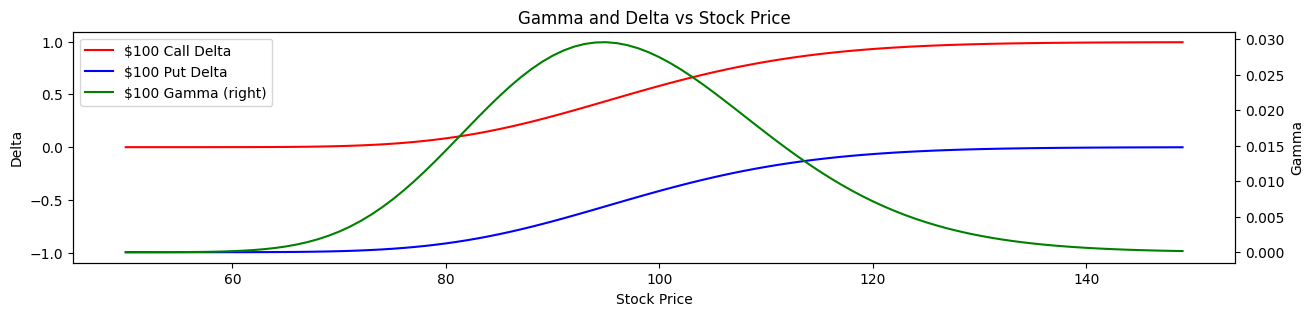

In [22]:
from financetoolkit.options import greeks_model
import pandas as pd

delta_vals_call = {}
delta_vals_put = {}
gamma_vals = {}

K = 100
RFR = 0.05
TTE = 180 / 365
VOL = 0.2
DIV_Y = 0.01

for stock_price in range(50, 150, 1):
    delta_vals_call[stock_price] = greeks_model.get_delta(
        stock_price=stock_price,
        strike_price=K,
        risk_free_rate=RFR,
        time_to_expiration=TTE,
        volatility=VOL,
        dividend_yield=DIV_Y,
    )

    delta_vals_put[stock_price] = greeks_model.get_delta(
        stock_price=stock_price,
        strike_price=K,
        risk_free_rate=RFR,
        time_to_expiration=TTE,
        volatility=VOL,
        dividend_yield=DIV_Y,
        put_option=True,
    )

    gamma_vals[stock_price] = greeks_model.get_gamma(
        stock_price=stock_price,
        strike_price=K,
        risk_free_rate=RFR,
        time_to_expiration=TTE,
        volatility=VOL,
        dividend_yield=DIV_Y,
    )


delta_vals_call_df = pd.Series(delta_vals_call)
delta_vals_put_df = pd.Series(delta_vals_put)
gamma_vals_df = pd.Series(gamma_vals)

delta_vals_call_df.name, delta_vals_put_df.name, gamma_vals_df.name = (
    "$100 Call Delta",
    "$100 Put Delta",
    "$100 Gamma",
)

delta_vals_call_df.plot(ylabel="Delta", figsize=(15, 3), color="red", legend=True)
delta_vals_put_df.plot(ylabel="Delta", figsize=(15, 3), color="blue", legend=True)
gamma_vals_df.plot(
    title="Gamma and Delta vs Stock Price",
    xlabel="Stock Price",
    ylabel="Gamma",
    color="green",
    secondary_y=True,
    figsize=(15, 3),
    legend=True,
)